<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/OLS_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running the First Regression in Python

Suppose this is your first time to write the code. Perhaps, you want to run a simple regression using two series of asset prices to fin the equity beta. Let's use a step-by-step approach to complete the task.

    Step 1: Download two assets' prices from the web
    Step 2: Put them onto a matrix form
    Step 3: Run the OLS
    Step 4: Plot data

### Step 1: Download data
We will use yahoo finance package (https://pypi.org/project/yfinance/) to download Yahoo Finance data from the web. We need to (1) install and (2) import this package.

In [1]:
!pip install yfinance   # to install, remove # and run the cell
import yfinance as yf    # to import

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 454 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# download
mystock = yf.download("TSLA", start="2011-01-01", end="2022-05-31", interval='1mo')['Adj Close'].rename('TSLA')
index = yf.download("SPY", start="2011-01-01", end="2022-05-31", interval='1mo')['Adj Close'].rename('SPY')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Step 2: Put two time series onto a matrix
We need pandas module, so let's install and import it. https://pandas.pydata.org/

In [3]:
#!pip install pandas   # Actually, you have this alread when you isntalled Anaconda.
import pandas as pd

In [4]:
# combine two asset prices onto one matrix called pandas dataframe
data = pd.concat([mystock, index], axis=1)

# drop missing observations
data2 = data.dropna()

# compute monthly returns and drop the first observation
data3 = data2.pct_change().dropna()
data3

,TSLA,SPY
Date,,
2011-02-01,-0.008714,0.034737
2011-03-01,0.161574,-0.004206
2011-04-01,-0.005405,0.033431
2011-05-01,0.092029,-0.011215
2011-06-01,-0.033510,-0.021719
...,...,...
2022-01-01,-0.113609,-0.049413
2022-02-01,-0.070768,-0.029517
2022-03-01,0.238009,0.034377


### Let's plot data.

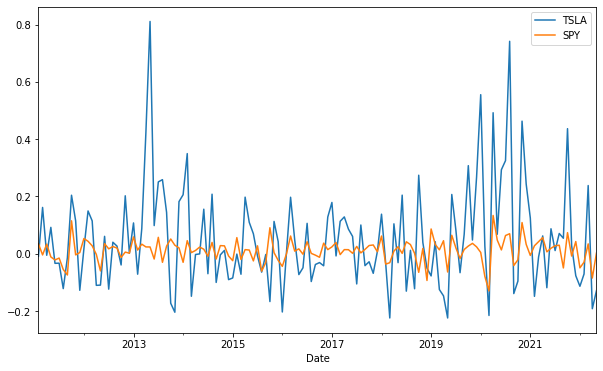

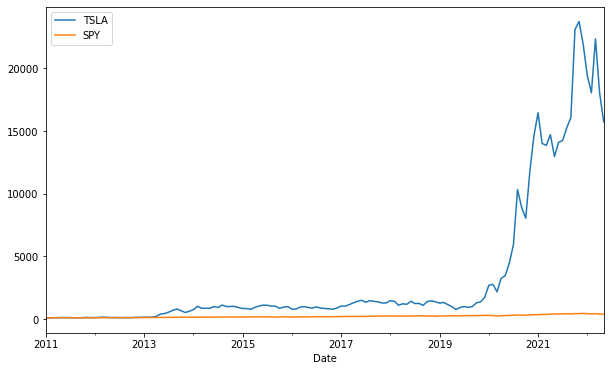

In [70]:
# need to import matplotlib. You already have this in your Jupyter environment, so no need to install.
import matplotlib.pyplot as plt       

data3.plot(subplots=False, figsize=(10, 6))                                # plot returns to see volatility levels

(data2 / data2.iloc[0] * 100).plot(figsize = (10, 6), subplots=False)      # plot the wealth change of $100 investment over time 

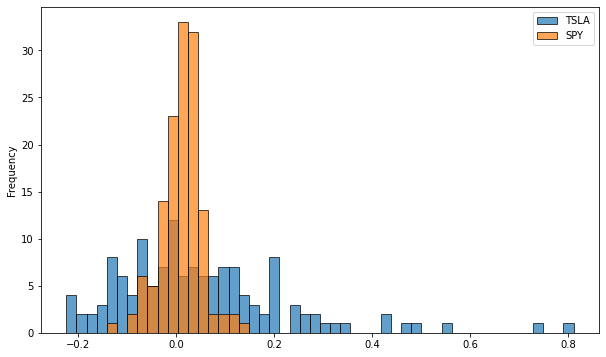

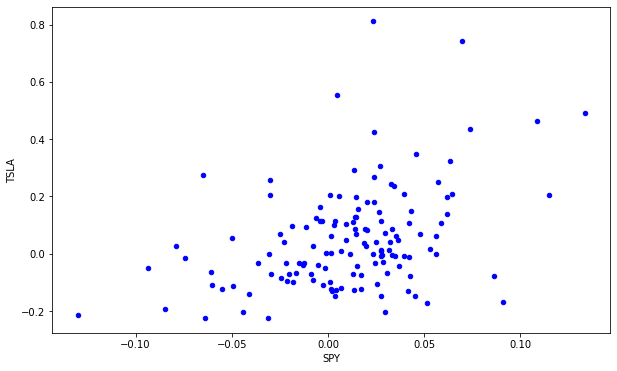

In [66]:
data3.plot.hist(bins=50, alpha=0.7, edgecolor='black', subplots=False, figsize=(10,6))
data3.plot.scatter(x='SPY', y='TSLA', c='blue',figsize=(10,6))

### Step 3: Run OLS
We need to install and import statsmodels module. https://www.statsmodels.org/stable/index.html

In [5]:
#!pip install statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [6]:
# run OLS
formula = 'TSLA ~ SPY'                      # set dep var and indep var
results = smf.ols(formula, data3).fit()     # run OLS
print(results.summary())                    # print  

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     25.35
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           1.51e-06
Time:                        20:16:33   Log-Likelihood:                 54.624
No. Observations:                 136   AIC:                            -105.2
Df Residuals:                     134   BIC:                            -99.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0319      0.015      2.198      0.0

### beta of TSLA = 1.7553

### Step 4: Plot the result
We need to install and import matplotlib module. https://matplotlib.org/

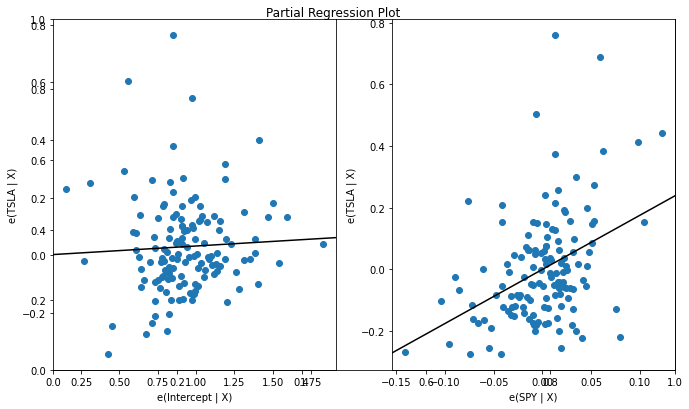

In [7]:
#!pip install matplotlib                            #again, if you installed Anaconda, you have this already.
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,6))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

### Extra 1: using scipy module, we can get the same beta!

In [8]:
#!pip install scipy         # Again, you probabaly have this installed in your Jupyter environment already
from scipy import stats

beta,alpha,r_value,p_value,std_err = stats.linregress(data3['SPY'],data3["TSLA"])

print(beta.round(4))
print(alpha.round(4))
print(r_value.round(2))
print(p_value.round(4))

1.7553
0.0319
0.4
0.0


### Extra 2: using a beta formula, we can get the same beta.

$$ 
\beta_{tsla} = \frac{\sigma_{tsla,spy}}{\sigma_{spy}^2}
$$


In [9]:
#  find covariance matrix
cov = data3.cov() * 12
print(cov)
print('\n')     # to give a space 
print(round(cov.iloc[0,1]/cov.iloc[1,1], 4))

          TSLA       SPY
TSLA  0.376962  0.034166
SPY   0.034166  0.019465


1.7553


### Extra3: using linear algebra, we can get the same beta.
Need to install numpy and import it. You probably have this alreay. So skip installation. Just import it. https://numpy.org/

$$
b=\begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_{k} \end{bmatrix}= (X^{'}X)^{-1}X^{'}Y
$$


So, a beta estimate form OLS is equal to X matrix transpose times X matrix and take an inverse times X transpose times  times Y vector.


In [10]:
# warnings are annoying, so I include below to supress them. You do not need to do this.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
import numpy as np

X = data3['SPY']
y = data3['TSLA']
X_ols = sm.add_constant(X)   # add a constant vector 
#print(X_ols)

# compute beta using matrix operation
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
print(round(beta[1], 4))

1.7553
